In [ ]:
!pip install pandas matplotlib seaborn openpyxl


In [ ]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
import os

# Ruta de la carpeta donde están los archivos
folder_path = "/content/drive/My Drive/Proyecto: Fraudes con Tarjetas de Crédito"

# Lista los archivos en la carpeta
files = os.listdir(folder_path)

# Carga cada archivo Excel
for file in files:
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        print(f"Datos del archivo: {file}")
        print(df.head())

In [ ]:
import os

folder_path = "/content/drive/My Drive/Proyecto: Fraudes con Tarjetas de Crédito"
print(os.listdir(folder_path))

['¿Qué rango de montos es más propenso a fraudes?.gsheet', 'Primeros diez resultados transacciones_de_fraude.gsheet', 'En qué momentos ocurren más fraudes.gsheet', 'Qué ciudades tienen mayor incidencia de fraudes.gsheet', 'Transacciones con desviacion significativa.gsheet', 'Verifica valores nulos en las columnas clave.gsheet', 'Distribución de montos de transacción.gsheet', 'categorias con mas fraudes.gsheet', 'Total transacciones fraudulentas.gsheet']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración estética para los gráficos
sns.set(style="whitegrid")  # Fondo de cuadrícula blanca
plt.rcParams["figure.figsize"] = (10, 6)  # Tamaño predeterminado de gráficos

In [ ]:
!pip install --upgrade gspread pandas gspread_dataframe



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [ ]:
from google.colab import auth
from google.auth import default
import gspread

# Autenticación
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd

# Reemplaza el nombre por el de tu archivo
spreadsheet_name = "categorias con mas fraudes"

# Abre la hoja
sheet = gc.open(spreadsheet_name).sheet1

# Convierte los datos en un DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Muestra las primeras filas
print(data.head())

  Transaction_Type  total_transacciones  total_fraudes  porcentaje_fraude
0         Transfer                 1660             89               5.36
1         Purchase                 1704             81               4.75
2       Withdrawal                 1636             81               4.95


In [ ]:
import gspread
from google.colab import auth
from google.auth import default
import pandas as pd

# Autenticar
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Reemplaza 'ID_DE_TU_HOJA' por el ID que copiaste
sheet = gc.open_by_key('1dvglk80oi1ZB7gFY84YQgOcrYJf-2UmawF4LyUEELGI')
worksheet = sheet.get_worksheet(0)  # Obtén la primera hoja

# Convertir los datos a un DataFrame
data = worksheet.get_all_records()
categorias_con_mas_fraudes = pd.DataFrame(data)

# Mostrar las primeras filas
print(categorias_con_mas_fraudes.head())


  Transaction_Type  total_transacciones  total_fraudes  porcentaje_fraude
0         Transfer                 1660             89               5.36
1         Purchase                 1704             81               4.75
2       Withdrawal                 1636             81               4.95


<ipython-input-31-6669cb4dc7d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


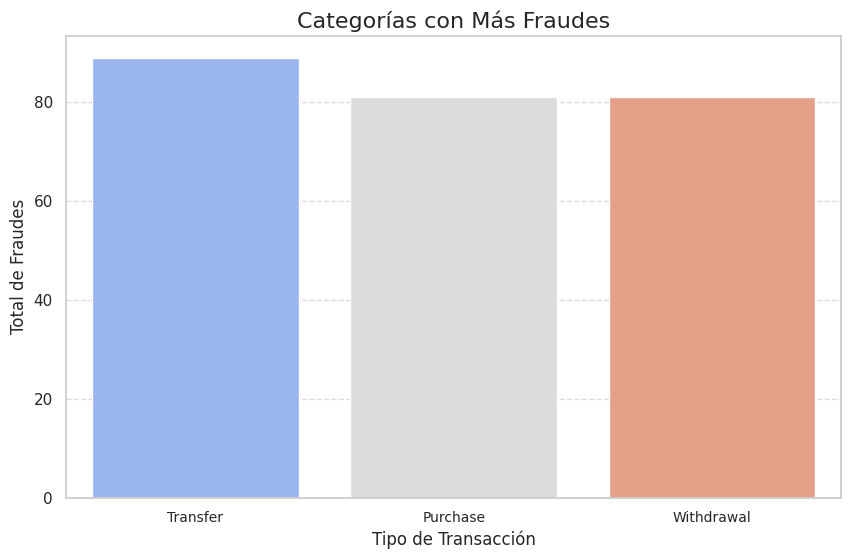

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna 'total_fraudes' para mayor claridad
df_sorted = categorias_con_mas_fraudes.sort_values(by="total_fraudes", ascending=False)

# Gráfico de barras
sns.barplot(
    data=df_sorted,
    x="Transaction_Type",
    y="total_fraudes",
    palette="coolwarm"
)

# Títulos y etiquetas
plt.title("Categorías con Más Fraudes", fontsize=16)
plt.xlabel("Tipo de Transacción", fontsize=12)
plt.ylabel("Total de Fraudes", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()


In [ ]:
import pandas as pd

# Reemplaza el nombre por el de tu archivo
spreadsheet_name = "Total transacciones fraudulentas"

# Abre la hoja
sheet = gc.open(spreadsheet_name).sheet1

# Convierte los datos en un DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Muestra las primeras filas
print(data.head())

   total_transacciones  total_fraudes  porcentaje_fraudes
0                 5000            251                5.02


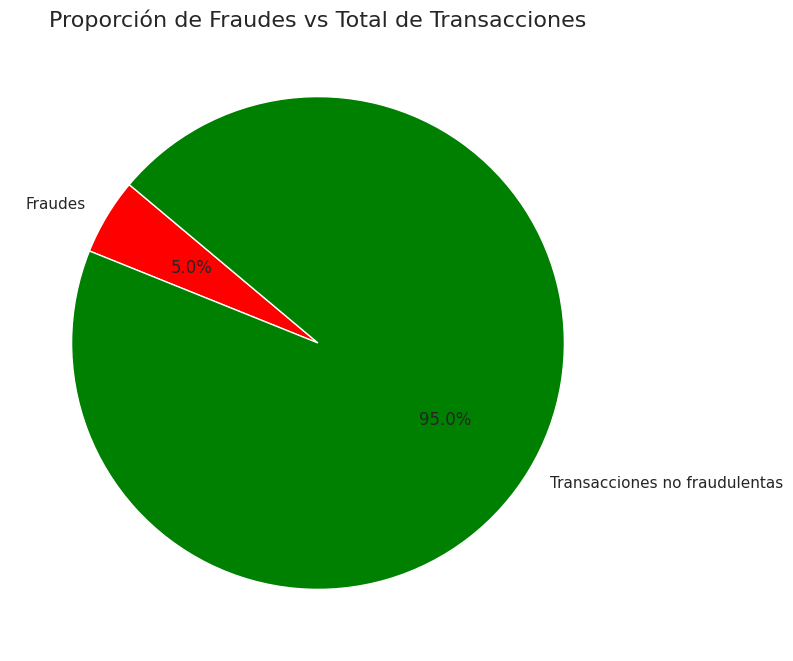

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reemplaza el nombre por el de tu archivo
spreadsheet_name = "Total transacciones fraudulentas"

# Abre la hoja
sheet = gc.open(spreadsheet_name).sheet1

# Convierte los datos en un DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Accede a los valores de 'total_fraudes' y 'total_transacciones' desde el DataFrame
# Asegúrate de que las columnas tienen los nombres correctos en tu hoja de cálculo
total_fraudes = data['total_fraudes'].values[0]  # Asumiendo que es el primer valor de la columna
total_transacciones = data['total_transacciones'].values[0] # Asumiendo que es el primer valor de la columna

# Verifica si la resta resulta en un valor negativo y corrige si es necesario
if total_transacciones - total_fraudes < 0:
    print("Advertencia: 'total_transacciones' es menor que 'total_fraudes'. Ajustando valores para evitar valores negativos.")
    # Opción 1: Intercambiar los valores si total_transacciones es menor
    # total_fraudes, total_transacciones = total_transacciones, total_fraudes
    # Opción 2: Asignar 0 al valor negativo
    #if total_transacciones-total_fraudes<0:
    #   total_fraudes=total_transacciones

    # Opción 3: Ajusta total_transacciones para que sea mayor o igual que total_fraudes
    total_transacciones = max(total_transacciones, total_fraudes)




fraude_total = [total_fraudes, total_transacciones - total_fraudes]
labels = ["Fraudes", "Transacciones no fraudulentas"]

plt.figure(figsize=(8, 8))
plt.pie(fraude_total, labels=labels, autopct="%1.1f%%", startangle=140, colors=["red", "green"])
plt.title("Proporción de Fraudes vs Total de Transacciones", fontsize=16)
plt.show()

In [ ]:
import pandas as pd

# Reemplaza el nombre por el de tu archivo
spreadsheet_name = "¿Qué rango de montos es más propenso a fraudes?"

# Abre la hoja
sheet = gc.open(spreadsheet_name).sheet1

# Convierte los datos en un DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Muestra las primeras filas
print(data.head())

   rango_monto_inferior  rango_monto_superior  total_transacciones  \
0                  3000                  3499                  531   
1                   500                   999                  504   
2                  2500                  2999                  500   
3                  2000                  2499                  466   
4                     0                   499                  525   

   total_fraudes  porcentaje_fraude  
0             33               6.21  
1             29               5.75  
2             26               5.20  
3             24               5.15  
4             27               5.14  


<ipython-input-55-823d46e9fedf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


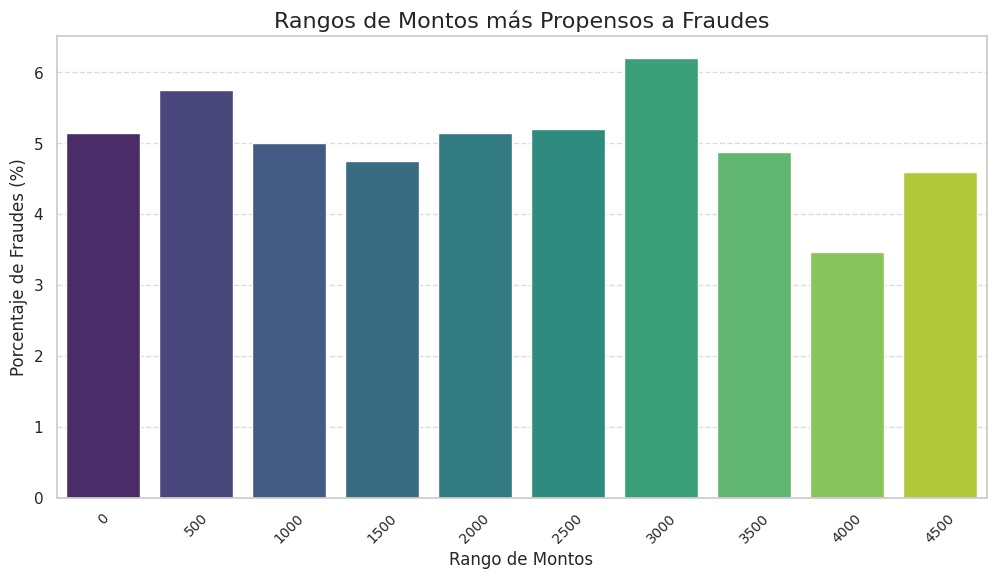

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,  # Using the 'data' DataFrame from the previous cell
    x="rango_monto_inferior",  # Assuming "rango_monto" is the column with range values
    y="porcentaje_fraude",  # Eje y: Porcentaje de fraudes
    palette="viridis"
)

# Personalización del gráfico
plt.title("Rangos de Montos más Propensos a Fraudes", fontsize=16)
plt.xlabel("Rango de Montos", fontsize=12)
plt.ylabel("Porcentaje de Fraudes (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje x para mayor claridad
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
import pandas as pd

# Reemplaza el nombre por el de tu archivo
spreadsheet_name = "Qué ciudades tienen mayor incidencia de fraudes"

# Abre la hoja
sheet = gc.open(spreadsheet_name).sheet1

# Convierte los datos en un DataFrame
data = pd.DataFrame(sheet.get_all_records())

# Muestra las primeras filas
print(data.head())

  Location  total_transacciones  total_fraudes  porcentaje_fraudes
0   City_D                 1202             66                5.49
1   City_A                 1279             64                5.00
2   City_B                 1290             63                4.88
3   City_C                 1229             58                4.72


<ipython-input-19-2acd0d65d597>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


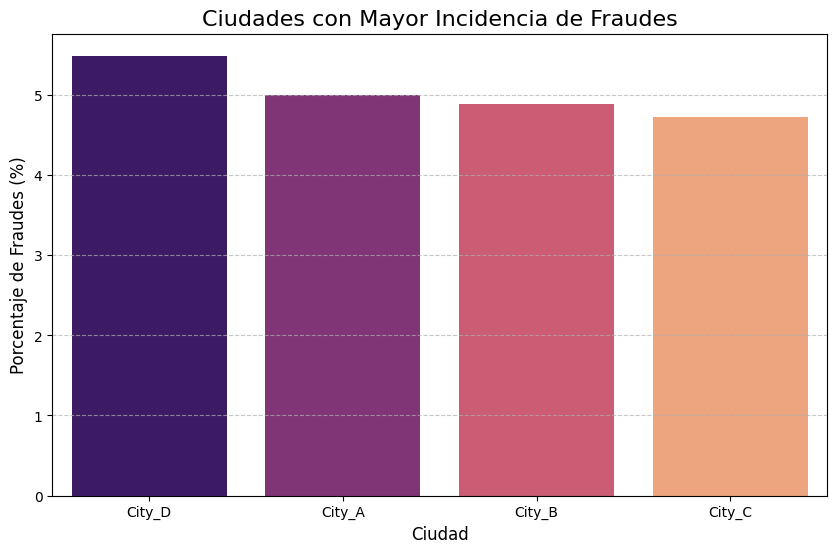

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,  # Reemplaza con el nombre de tu DataFrame
    x="Location",  # Eje x: Ciudades
    y="porcentaje_fraudes",  # Eje y: Porcentaje de fraudes
    palette="magma"
)

# Personalización del gráfico
plt.title("Ciudades con Mayor Incidencia de Fraudes", fontsize=16)
plt.xlabel("Ciudad", fontsize=12)
plt.ylabel("Porcentaje de Fraudes (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Ruta del archivo
file_path = '/content/credit_card_fraud_synthetic.csv'

# Cargar el archivo en un DataFrame
df = pd.read_csv(file_path)

# Verificar que los datos están cargados
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/credit_card_fraud_synthetic.csv'

<ipython-input-24-fbd017cc91a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Is_Fraudulent"], y=df["Transaction_Amount"], palette=["blue", "red"])


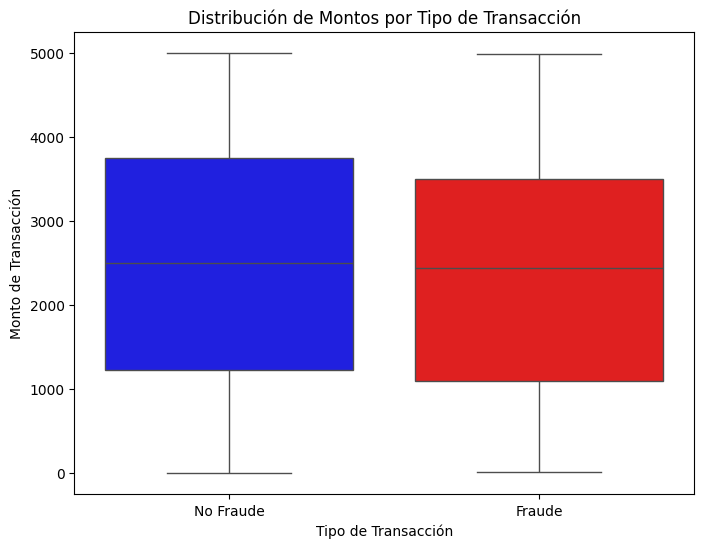

In [ ]:
# Crear el boxplot para comparar la distribución de montos entre fraudes y no fraudes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Is_Fraudulent"], y=df["Transaction_Amount"], palette=["blue", "red"])

# Personalizar etiquetas
plt.xticks(ticks=[0, 1], labels=["No Fraude", "Fraude"])
plt.xlabel("Tipo de Transacción")
plt.ylabel("Monto de Transacción")
plt.title("Distribución de Montos por Tipo de Transacción")

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los rangos de montos de transacción
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ["0-499", "500-999", "1000-1499", "1500-1999", "2000-2499",
          "2500-2999", "3000-3499", "3500-3999", "4000-4499", "4500-4999"]

# Crear una nueva columna con los rangos
df["Monto_Rango"] = pd.cut(df["Transaction_Amount"], bins=bins, labels=labels, right=False)

# Calcular el total de transacciones y fraudes por rango
fraude_por_rango = df.groupby("Monto_Rango")["Is_Fraudulent"].agg(["count", "sum"])
fraude_por_rango.columns = ["Total_Transacciones", "Total_Fraudes"]

# Calcular la proporción de fraudes
fraude_por_rango["Porcentaje_Fraude"] = (fraude_por_rango["Total_Fraudes"] / fraude_por_rango["Total_Transacciones"]) * 100

# Graficar la proporción de fraudes por rango de montos
plt.figure(figsize=(10, 6))
sns.barplot(x=fraude_por_rango.index, y=fraude_por_rango["Porcentaje_Fraude"], color="red")

# Personalizar el gráfico
plt.xlabel("Rango de Montos de Transacción")
plt.ylabel("Porcentaje de Fraudes")
plt.title("Proporción de Fraudes por Rango de Montos")
plt.xticks(rotation=45)
plt.show()

# Mostrar los datos calculados
fraude_por_rango


NameError: name 'df' is not defined